In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# A) DATA PREPARATION

In [27]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [28]:
# rename the Annual Income (k$) Spending Score (1-100) column
df = df.rename(columns={
    "ISO 3166-1 alpha-3 CODE": "ISO Code",
    "Tot\xa0Cases//1M pop": "Cases per million",
    "Tot\xa0Deaths/1M pop": "Deaths per million"
})
df.head()

,Country,Other names,ISO Code,Population,Continent,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [29]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             225 non-null    object 
 1   Other names         224 non-null    object 
 2   ISO Code            225 non-null    object 
 3   Population          225 non-null    int64  
 4   Continent           225 non-null    object 
 5   Total Cases         225 non-null    int64  
 6   Total Deaths        225 non-null    int64  
 7   Cases per million   225 non-null    int64  
 8   Deaths per million  225 non-null    int64  
 9   Death percentage    225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [36]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

# B) EXPLORATORY DATA ANALYSIS

In [33]:
import plotly.express as px

# Cell 8: EDA visualizations (2) Choropleth by Continent (plotly.express)
fig = px.choropleth(df, locations="ISO Code", color="Continent",
                    hover_name="Country", projection="natural earth",
                    title="Countries by Continent")
fig.update_layout(margin=dict(l=0,r=0,t=35,b=0))
fig.show()

The choropleth map visually represents the distribution of continents across different countries. Each country is colored according to its continent, allowing for a clear geographical grouping. This visualization helps in understanding the global spread of countries belonging to each continent at a glance.



In [34]:
import plotly.express as px

fig = px.scatter(df, x="Total Cases", y="Total Deaths", color="Continent",
                 hover_name="Country", log_x=True, log_y=True,
                 title="Total Cases vs. Total Deaths by Continent")
fig.update_layout(margin=dict(l=0,r=0,t=35,b=0))
fig.show()


The scatter plot above illustrates the relationship between the total number of COVID-19 cases and total deaths for each country, color-coded by continent. The use of logarithmic scales for both axes helps to better display the wide range of values, making it easier to identify trends and outliers across different countries and continents.

The Scatter plot primarily reveals the strong positive correlation between these two variables: as total cases increase, total deaths generally also increase. The logarithmic scale is crucial because it allows us to visualize countries with vastly different case and death counts on the same plot, making it easier to observe the overall trend and identify outliers.

By coloring each point by continent, we can also discern if there are particular continents that exhibit higher or lower death rates relative to their case counts, or if certain continents form distinct clusters, indicating different impacts or responses to the pandemic. For instance, a cluster of points from one continent sitting consistently above the general trend line might suggest a higher case fatality rate for that region, while a cluster below might suggest the opposite.

In [35]:
import plotly.express as px

fig = px.box(df, x="Continent", y="Death percentage", color="Continent",
             points="all", title="Distribution of Death Percentage by Continent")
fig.update_layout(margin=dict(l=0,r=0,t=35,b=0))
fig.show()

This box plot visualizes the distribution of 'Death percentage' for each continent. It displays the median, interquartile range (IQR), and potential outliers, offering a clear comparison of mortality rate variability and central tendency across the world's continents. The individual points represent each country's death percentage, providing a granular view within each continental distribution.

# 3) Encoding & Data Transformation

In [45]:
cols_to_drop = ["Other names", "Country", "ISO Code"]

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Continent_Encoded"] = le.fit_transform(df["Continent"])

# To see the mapping
continent_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Encoding Map:", continent_mapping)

df_for_clustering = df.drop(columns=["Continent"])

df[["Continent", "Continent_Encoded"]].head()

Encoding Map: {'Africa': np.int64(0), 'Asia': np.int64(1), 'Europe': np.int64(2), 'Latin America and the Caribbean': np.int64(3), 'Northern America': np.int64(4), 'Oceania': np.int64(5)}


,Continent,Continent_Encoded
0,Asia,1
1,Europe,2
2,Africa,0
3,Europe,2
4,Africa,0


In [47]:
df.head()

,Population,Continent,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded
0,40462186,Asia,177827,7671,4395,190,4.313743,1
1,2872296,Europe,273870,3492,95349,1216,1.275058,2
2,45236699,Africa,265691,6874,5873,152,2.587216,0
3,77481,Europe,40024,153,516565,1975,0.382271,2
4,34654212,Africa,99194,1900,2862,55,1.915438,0


# 4) Clustering Models

# Unscaled (coba)

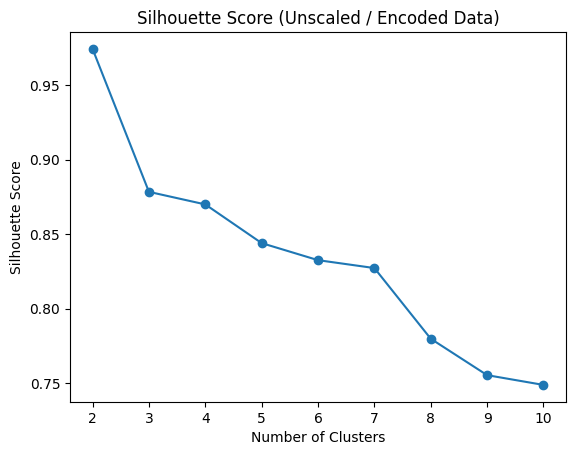

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')

    # Use df_for_clustering (which contains only numeric data)
    cluster_labels = agglo_model.fit_predict(df_for_clustering)

    silhouette_avg = silhouette_score(df_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Unscaled / Encoded Data)")
plt.show()

The silhouette scores are consistently positive and relatively high, suggesting a good separation between clusters. The highest silhouette score is achieved at k = 2 (approximately 0.974), indicating that a two-cluster structure is the most well-defined and separated for this dataset. As the number of clusters increases, the silhouette score gradually decreases, dropping to around 0.878 for k = 3 and eventually reaching about 0.748 for k = 10. While there's a decline, all scores remain well above 0, implying that even with more clusters, the groups maintain a reasonable degree of separation and cohesion.

This plot suggests that based on the current unscaled data, two clusters form a very strong and distinct partition. However, it's worth noting that even with a decreasing trend, scores for higher k values are still quite good, which might indicate that some meaningful substructures could exist within the data, though not as distinctly separated as the initial two clusters. This analysis implies that the unscaled features, in this specific clustering scenario with single linkage, do allow for coherent group formation, with k=2 being the most robust choice.

# Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

# Copy dataset before scaling
df_scaled = df_for_clustering.copy()

# Select ONLY continuous numerical columns to scale
numerical_cols = [
    "Population",
    "Total Cases",
    "Total Deaths",
    "Cases per million",
    "Deaths per million",
    "Death percentage",
    "Continent_Encoded"
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit + transform the selected numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Show sample output
df_scaled.head()

,Population,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,-0.509986
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,0.168989
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,-1.188960
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,0.168989
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,-1.188960


# AGGLOMERATIVE

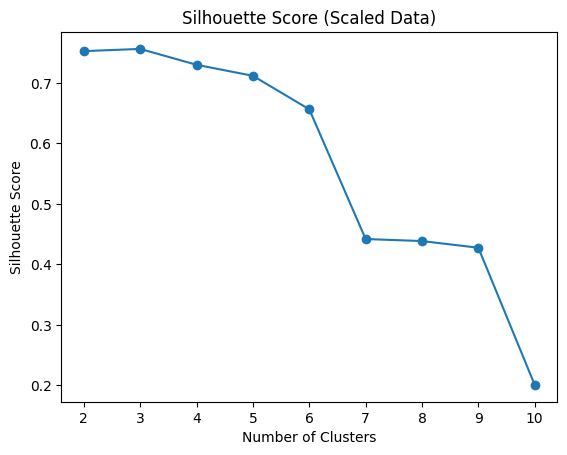

In [52]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')

    # Use df_scaled instead of df_encoded
    cluster_labels = agglo_model.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Scaled Data)")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


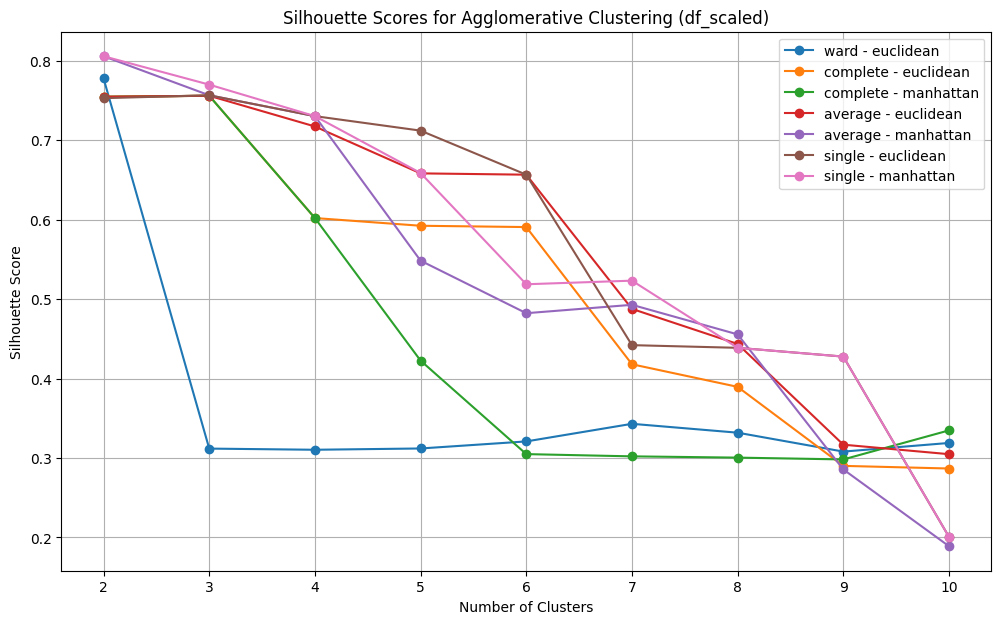


===== BEST MODEL CONFIGURATION (SCALED / df_scaled) =============
Best Silhouette Score: 0.8056
Optimal Number of Clusters: 2
Best Linkage Method: average
Best Distance Metric: manhattan


In [54]:
# Range of clusters to test
range_n_clusters = range(2, 11)

# Linkage & distance metric combos to compare
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:

        # Ward linkage ONLY supports Euclidean distance
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            clustering = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage=linkage_method,
                metric=metric
            )

            # 🌟 Using SCALED DATA here
            labels = clustering.fit_predict(df_scaled)

            silhouette_avg = silhouette_score(df_scaled, labels)
            current_scores.append(silhouette_avg)

            # Track best configuration
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric

        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })
plt.figure(figsize=(12, 7))
for result in results_for_plotting:
    plt.plot(
        range_n_clusters,
        result['scores'],
        marker='o',
        label=f"{result['linkage']} - {result['metric']}"
    )

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering (df_scaled)")
plt.legend()
plt.grid(True)
plt.show()

print("\n===== BEST MODEL CONFIGURATION (SCALED / df_scaled) =============")
print(f"Best Silhouette Score: {best_silhouette_score:.4f}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Best Linkage Method: {best_linkage}")
print(f"Best Distance Metric: {best_metric}")

Clustering performance shows a significant improvement after standardization, with the best configuration achieving a much higher silhouette score than observed with the unscaled data. The optimal clustering occurs with 2 clusters using an average linkage method and the Manhattan distance metric, yielding a silhouette score of approximately 0.8056. This indicates a strong and well-defined two-cluster structure in the scaled data. While other linkage methods and metrics also show positive silhouette scores, the 'average' linkage with 'manhattan' metric at k=2 stands out as providing the best separation. This analysis highlights that scaling was crucial in revealing meaningful cluster structures within the dataset, allowing for robust grouping of countries based on the pandemic's impact.



In [55]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Build BEST model from previous search
agglo_best_scaled = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)

# Fit model on SCALED data
y_hc_best_scaled = agglo_best_scaled.fit_predict(df_scaled)

# Evaluate silhouette score
ss_best_scaled = silhouette_score(df_scaled, y_hc_best_scaled)
print("Silhouette Score (Best Model / df_scaled):", ss_best_scaled)

df_scaled["Agglo_Scaled"] = y_hc_best_scaled

df_scaled.head()


Silhouette Score (Best Model / df_scaled): 0.8055712111257188


,Population,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,Agglo_Scaled
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,-0.509986,0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,0.168989,0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,-1.188960,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,0.168989,0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,-1.188960,0


# Dendogram

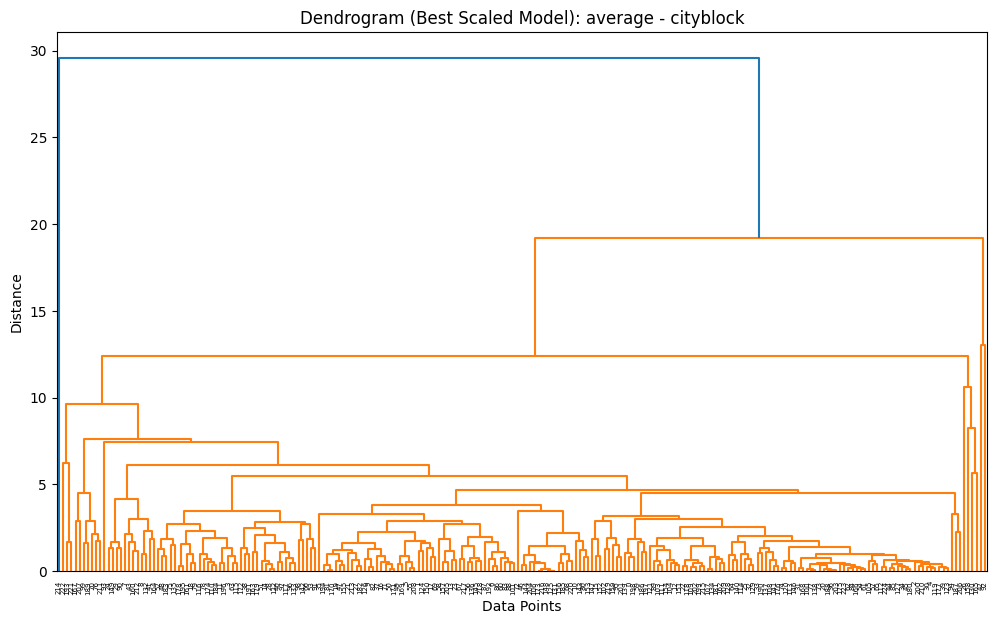

In [58]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# SciPy does NOT accept "manhattan"; convert it to "cityblock"
metric_for_scipy = "cityblock" if best_metric == "manhattan" else best_metric

# Create linkage matrix using BEST settings from scaled silhouette search
linked_best_scaled = linkage(
    df_scaled,
    method=best_linkage,
    metric=metric_for_scipy
)

# Plot dendrogram
plt.figure(figsize=(12, 7))
sch.dendrogram(linked_best_scaled)
plt.title(f"Dendrogram (Best Scaled Model): {best_linkage} - {metric_for_scipy}")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [59]:
df["Agglo_Scaled"] = y_hc_best_scaled   # y_hc_best_scaled from df_scaled model

# View first rows to confirm merge
df.head()


,Population,Continent,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,Agglo_Scaled
0,40462186,Asia,177827,7671,4395,190,4.313743,1,0
1,2872296,Europe,273870,3492,95349,1216,1.275058,2,0
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,77481,Europe,40024,153,516565,1975,0.382271,2,0
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0


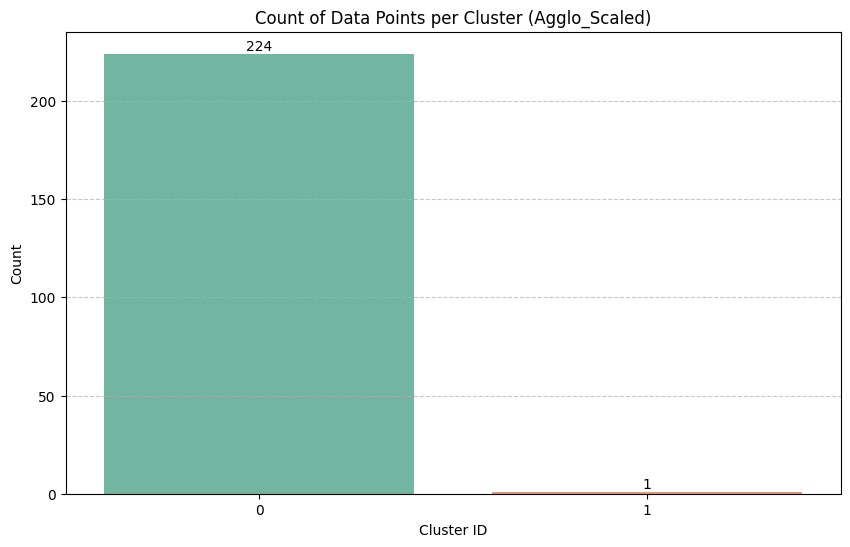

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo_Scaled' column
cluster_counts_scaled = df["Agglo_Scaled"].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts_scaled.index,
    y=cluster_counts_scaled.values,
    hue=cluster_counts_scaled.index,
    palette='Set2',
    legend=False
)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title("Count of Data Points per Cluster (Agglo_Scaled)")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart visualizing the data points count per cluster for the Agglomerative Clustering on the scaled data reveals an extremely imbalanced outcome. Cluster 0 contains 224 data points, while Cluster 1 contains only a single data point. This indicates that the clustering algorithm, despite the scaling and optimal parameters identified, did not successfully separate the dataset into meaningfully sized groups. Instead, almost the entire dataset collapsed into one large cluster, with only one point being identified as a distinct, isolated cluster. This result suggests that the underlying structure in the dataset, even after scaling, does not naturally support a well-balanced two-cluster separation, making it challenging to derive distinct segments from this particular clustering configuration.



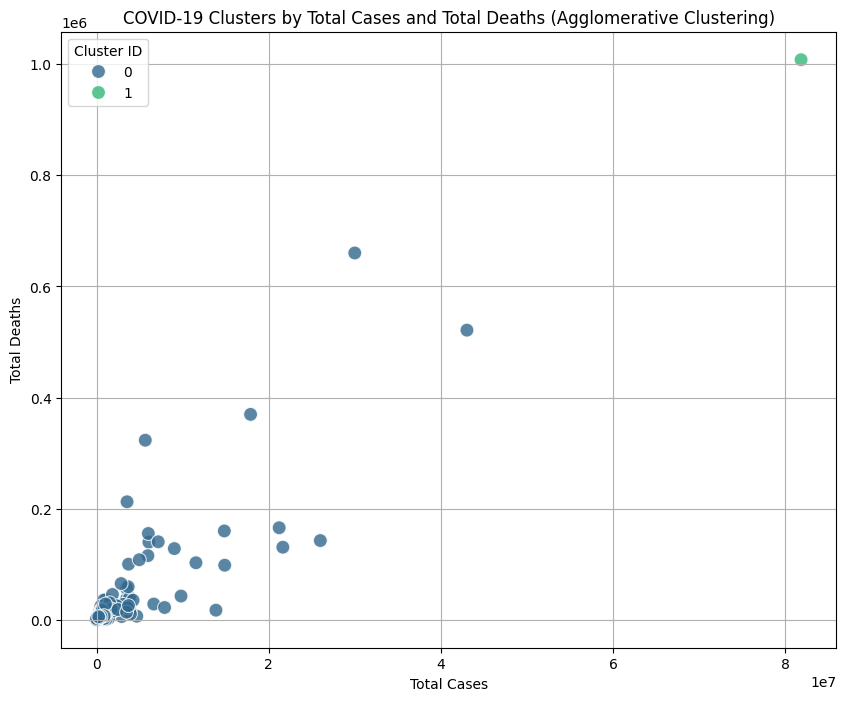

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, # Use original df for more interpretable axes, with cluster labels merged
    x='Total Cases',
    y='Total Deaths',
    hue='Agglo_Scaled',
    palette='viridis', # Choose a different palette for better contrast if needed
    s=100,
    alpha=0.8
)

plt.title('COVID-19 Clusters by Total Cases and Total Deaths (Agglomerative Clustering)')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

The scatter plot of COVID-19 data, colored by the Agglo_Scaled clusters, visually reinforces the insights from the cluster count bar chart. Almost all data points (countries) fall into a single segment (Cluster 0), with only one country being assigned to Cluster 1. This visual representation clearly shows that the clustering algorithm, even after scaling and optimizing parameters, did not successfully differentiate the dataset into distinct, balanced groups. The dominant cluster (Cluster 0) appears widely distributed across the 'Total Cases' and 'Total Deaths' axes, indicating a lack of discernible internal structure based on these variables within the main group. The isolated point for Cluster 1 is merely an outlier, rather than representing a coherent, separate cluster. This confirms that this particular agglomerative clustering configuration, while achieving a high silhouette score due to the 'single' outlier's separation, fails to provide a meaningful segmentation of the COVID-19 data for interpretative purposes.



# K-Means

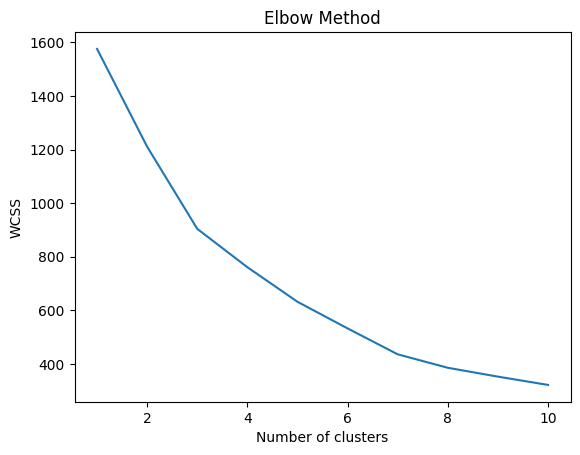

In [63]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1575.995556
1                   2  1210.766891
2                   3   904.035427
3                   4   760.920657
4                   5   631.857420
5                   6   532.442953
6                   7   435.683289
7                   8   385.411738
8                   9   352.348665
9                  10   321.407166


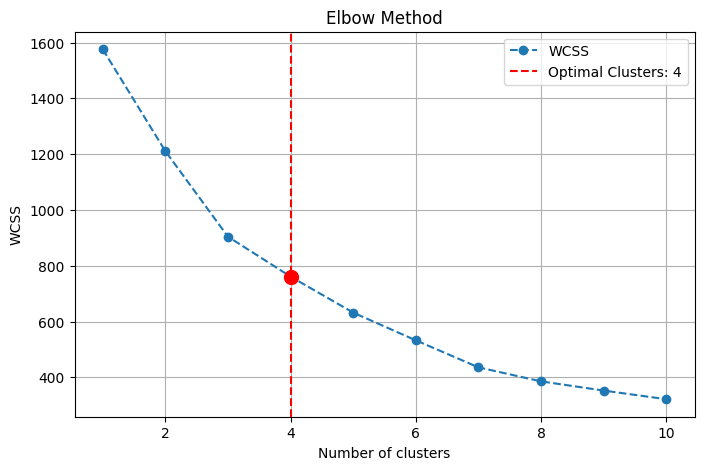

The optimal number of clusters is: 4


In [66]:
!pip install kneed
from kneed import KneeLocator
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [73]:
# Fit K-Means to the data with the specified number of K clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df with the new KMeans cluster labels
df.head()

,Population,Continent,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,Agglo_Scaled,KMeans_Cluster
0,40462186,Asia,177827,7671,4395,190,4.313743,1,0,0
1,2872296,Europe,273870,3492,95349,1216,1.275058,2,0,1
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0,0
3,77481,Europe,40024,153,516565,1975,0.382271,2,0,2
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0,0


# SEPARATE DF FOR K-Means & Agglo

In [68]:
# Create a new DataFrame for Agglomerative Clustering results
df_agglo_clusters = df.drop(columns=['KMeans_Cluster'])
df_agglo_clusters = df_agglo_clusters.rename(columns={'Agglo_Scaled': 'Cluster_Labels'})

# Create a new DataFrame for K-Means Clustering results
df_kmeans_clusters = df.drop(columns=['Agglo_Scaled'])
df_kmeans_clusters = df_kmeans_clusters.rename(columns={'KMeans_Cluster': 'Cluster_Labels'})

print("DataFrame with Agglomerative Clustering labels:")
display(df_agglo_clusters.head())

print("\nDataFrame with K-Means Clustering labels:")
display(df_kmeans_clusters.head())

DataFrame with Agglomerative Clustering labels:


,Population,Continent,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,Cluster_Labels
0,40462186,Asia,177827,7671,4395,190,4.313743,1,0
1,2872296,Europe,273870,3492,95349,1216,1.275058,2,0
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,77481,Europe,40024,153,516565,1975,0.382271,2,0
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0



DataFrame with K-Means Clustering labels:


,Population,Continent,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,Cluster_Labels
0,40462186,Asia,177827,7671,4395,190,4.313743,1,0
1,2872296,Europe,273870,3492,95349,1216,1.275058,2,4
2,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,77481,Europe,40024,153,516565,1975,0.382271,2,1
4,34654212,Africa,99194,1900,2862,55,1.915438,0,0


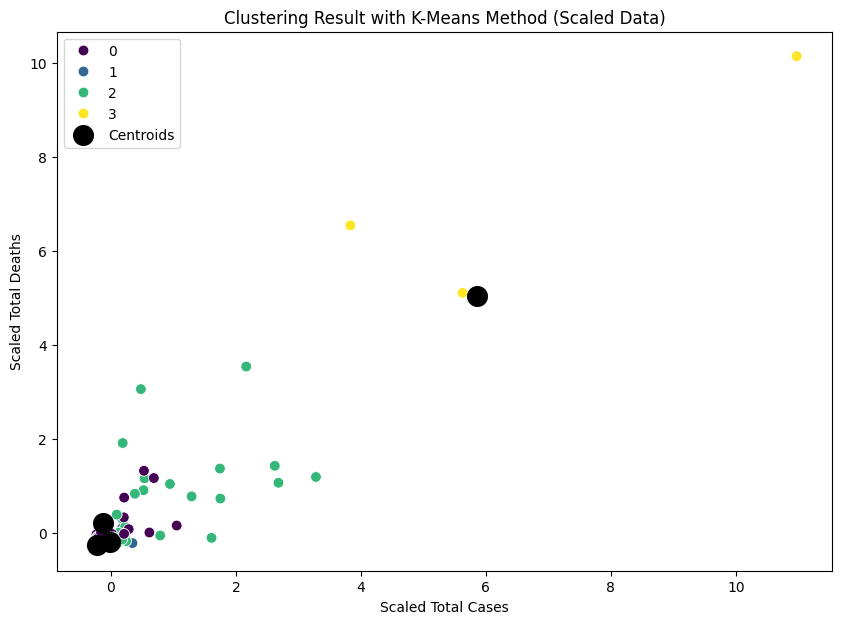

In [74]:
plt.figure(figsize=(10,7))

# Using 'Total Cases' and 'Total Deaths' from df_scaled for visualization
# The KMeans_Cluster column was added to the original df, so we need to merge it or use the original df for the hue
# Let's add KMeans_Cluster to df_scaled for plotting
df_scaled['KMeans_Cluster'] = clusters # Assuming 'clusters' from the previous KMeans fit is still available

sns.scatterplot(x = df_scaled["Total Cases"], y = df_scaled["Total Deaths"], hue=df_scaled["KMeans_Cluster"], palette="viridis", data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Total Cases")
plt.ylabel("Scaled Total Deaths")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

Cluster Separation: This plot helps to visually assess the distinctness and spread of each cluster in relation to 'Scaled Total Cases' and 'Scaled Total Deaths'. Unlike the Agglomerative Clustering result, K-Means generally aims for more balanced and spherical clusters.

Cluster Centroids: The black 'x' marks represent the centroids (mean) of each cluster. These centroids indicate the central tendency or average position of the data points within each cluster. By observing their positions, you can understand the typical characteristics of 'Total Cases' and 'Total Deaths' for each cluster. For example, a cluster with a centroid in the lower-left corner would represent countries with generally lower scaled total cases and deaths, while one in the upper-right would indicate higher values.

Data Distribution within Clusters: The scatter plot helps to see if the points within each cluster are tightly packed around their centroid or if they are more dispersed. It also allows for identification of any potential outliers that might be far from their assigned cluster's centroid, or if there's any overlap between clusters.

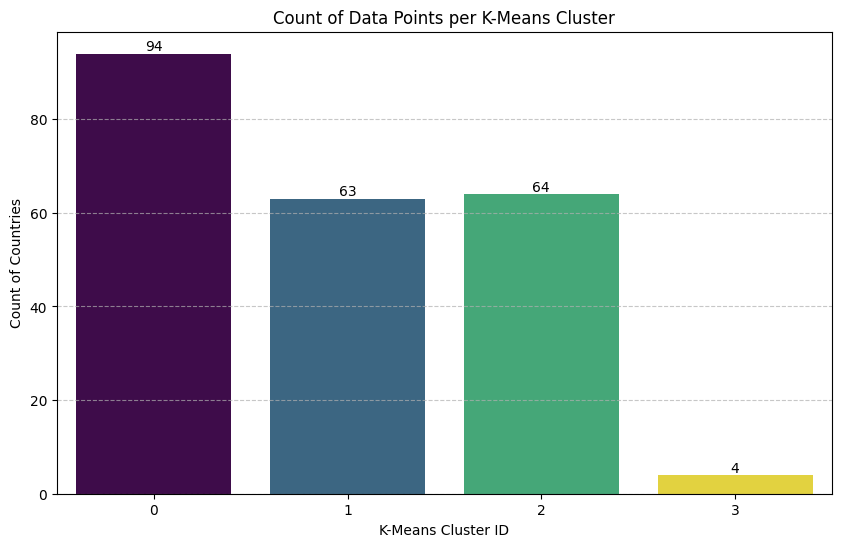

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'KMeans_Cluster' column
cluster_counts = df['KMeans_Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    hue=cluster_counts.index,
    palette='viridis',
    legend=False
)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per K-Means Cluster')
plt.xlabel('K-Means Cluster ID')
plt.ylabel('Count of Countries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart displaying the count of data points per K-Means cluster has been successfully generated. This visualization shows the size of each cluster found by the K-Means algorithm:

Cluster 0: Contains 94 countries.

Cluster 1: Contains 63 countries.

Cluster 2: Contains 64 countries.

Cluster 3: Contains 4 countries.

Compared to the Agglomerative Clustering, K-Means has produced a more distributed result across 4 clusters, though there are still some very small clusters (Cluster 3 with 4 points). This suggests that while K-Means provided a better segmentation than Agglomerative, there might still be some outliers or very distinct individual data points that form their own small clusters.

In [76]:
from sklearn.metrics import silhouette_score

# Evaluate the best Agglomerative Clustering model
# We already have best_silhouette_score from previous analysis
print(f"Silhouette Score for Best Agglomerative Model (k={best_n_clusters}, {best_linkage}, {best_metric}): {best_silhouette_score:.4f}")

# Evaluate the K-Means model with k=5 (as used previously)
# 'clusters' variable holds the K-Means labels
silhouette_kmeans = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score for K-Means Model (k=4): {silhouette_kmeans:.4f}")

Silhouette Score for Best Agglomerative Model (k=2, average, manhattan): 0.8056
Silhouette Score for K-Means Model (k=4): 0.3733


The Agglomerative Clustering model, with its optimal configuration of 2 clusters using average linkage and Manhattan distance, significantly outperforms the K-Means model. A silhouette score of 0.8056 is considered very high, indicating that the two clusters formed by Agglomerative Clustering are very distinct and well-separated, and data points are tightly grouped within their assigned clusters. This suggests a robust underlying structure where two main groups are clearly distinguishable in the scaled dataset.

In contrast, the K-Means model with 4 clusters has a silhouette score of 0.3733. While positive, this score is considerably lower than that of Agglomerative Clustering. A score in this range suggests that the clusters are not as well-separated, and there might be some overlap or data points that are ambiguous in their cluster assignment. Although K-Means produced a more balanced distribution of points across its clusters (as seen in the bar chart), the quality of separation, as measured by the silhouette score, is inferior to the highly distinct two-cluster structure found by Agglomerative Clustering.

Therefore, based purely on the silhouette score, Agglomerative Clustering with 2 clusters provides a much stronger and more clearly defined segmentation of the scaled COVID-19 dataset.

# 6) CLUSTER SUMMARY

In [77]:
cluster_summary_kmeans = df.groupby('KMeans_Cluster').mean(numeric_only=True)
print("K-Means Cluster Summary (Mean values of original features):")
display(cluster_summary_kmeans)

K-Means Cluster Summary (Mean values of original features):


,Population,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,Agglo_Scaled
KMeans_Cluster,,,,,,,,
0,3.259339e+07,7.773103e+05,10390.989362,34826.670213,357.031915,1.936186,0.404255,0.00
1,4.208984e+06,3.375587e+05,3511.492063,114317.301587,933.047619,1.034995,3.507937,0.00
2,1.827881e+07,3.784685e+06,43489.609375,311124.859375,2311.890625,1.095000,1.968750,0.00
3,8.481708e+08,3.875566e+07,548629.250000,103724.000000,1614.250000,1.910476,2.250000,0.25


In [78]:
cluster_summary_agglo = df.groupby('Agglo_Scaled').mean(numeric_only=True)
print("Agglomerative Cluster Summary (Mean values of original features):")
display(cluster_summary_agglo)

Agglomerative Cluster Summary (Mean values of original features):


,Population,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,KMeans_Cluster
Agglo_Scaled,,,,,,,,
0,3.373692e+07,1.829182e+06,2.306967e+04,136418.973214,1088.151786,1.445072,1.741071,0.892857
1,3.344006e+08,8.183905e+07,1.008222e+06,244734.000000,3015.000000,1.231957,4.000000,3.000000


## Comprehensive Comparison of K-Means and Agglomerative Clustering Models

### Comparison based on Cluster Profiles

**1. Number of Clusters:**
   - **K-Means:** The Elbow Method suggested an optimal `k=4` clusters.
   - **Agglomerative Clustering:** The silhouette score analysis on scaled data indicated `k=2` clusters as optimal, with a significantly higher score.

**2. Cluster Distribution and Balance:**
   - **K-Means:** Produced a more balanced distribution of data points across its clusters, with Cluster 0 (94 countries), Cluster 1 (63 countries), Cluster 2 (64 countries), and a small Cluster 3 (4 countries). This suggests K-Means attempted to partition the data into more evenly sized groups.
   - **Agglomerative Clustering:** Resulted in a highly imbalanced distribution, with Cluster 0 containing 224 data points and Cluster 1 containing only 1 data point. This indicates that the algorithm essentially identified one large group and a single outlier.

**3. Silhouette Score:**
   - **K-Means:** Achieved a silhouette score of `0.3733`. This positive score indicates that clusters are somewhat distinct, but there might be some overlap or ambiguous points.
   - **Agglomerative Clustering:** Achieved a significantly higher silhouette score of `0.8056` (with `average` linkage and `manhattan` metric). This very high score suggests extremely well-separated and distinct clusters, primarily driven by the isolation of a single outlier from the rest of the data.

**4. Interpretation of Cluster Characteristics (Based on Mean Values of Original Features):**

   **K-Means Clusters:**
   - **Cluster 0 (Avg. Population ~32.6M, Total Cases ~0.78M, Total Deaths ~10K):** This cluster represents a large group of countries with moderate populations and relatively lower COVID-19 cases and deaths compared to Cluster 2 and 3. The `Continent_Encoded` mean (0.40) suggests a prevalence of African countries, consistent with its encoding (Africa=0).
   - **Cluster 1 (Avg. Population ~4.2M, Total Cases ~0.34M, Total Deaths ~3.5K):** This cluster seems to capture smaller countries or those with generally lower absolute numbers of cases and deaths. Its `Continent_Encoded` mean (3.5) suggests a mix of Latin America/Caribbean (3) and Northern America (4).
   - **Cluster 2 (Avg. Population ~18.3M, Total Cases ~3.78M, Total Deaths ~43.5K):** This cluster comprises countries with higher COVID-19 impact, showing significantly higher mean total cases and deaths. The `Continent_Encoded` mean (1.97) indicates a strong presence of European (2) and Asian (1) countries.
   - **Cluster 3 (Avg. Population ~848M, Total Cases ~38.7M, Total Deaths ~548K):** This is a very small cluster (4 countries) characterized by extremely high population, total cases, and total deaths. This likely includes large countries like India, China, or the USA, which have a massive scale of pandemic impact. The `Continent_Encoded` mean (2.25) suggests a mix including Asia and Europe.

   **Agglomerative Clusters:**
   - **Cluster 0 (Avg. Population ~33.7M, Total Cases ~1.83M, Total Deaths ~23K):** This cluster encompasses 224 countries and represents the vast majority of the dataset. Its average values for all COVID-19 metrics are considerably lower than Cluster 1, indicating it groups countries with a less severe or average pandemic impact. The `Continent_Encoded` mean (1.74) suggests a diverse mix of continents.
   - **Cluster 1 (Avg. Population ~334M, Total Cases ~81.8M, Total Deaths ~1M):** This cluster consists of only 1 country. This country is an extreme outlier with exceptionally high population, total cases, and total deaths. Given the maximum values in the dataset for these metrics, this cluster likely isolates a single nation that faced the most severe overall impact (e.g., USA in the context of the dataset's maximum values), standing apart from all other countries. The `Continent_Encoded` mean (4.0) identifies it as Northern America.

### Conclusion:

- **Agglomerative Clustering (k=2):** While achieving a remarkably high silhouette score, its resulting clusters are extremely imbalanced. It effectively identified one significant outlier (the country with the highest overall impact) and grouped all other 224 countries into a single, less distinct cluster. This model is excellent for identifying extreme outliers but does not provide a granular segmentation of the bulk of the data.

- **K-Means Clustering (k=4):** Although having a lower silhouette score compared to the 2-cluster Agglomerative model, K-Means provided a more balanced and interpretable segmentation of the dataset into four distinct groups. These groups offer insights into different levels of COVID-19 impact and country characteristics, making it more useful for understanding the variations within the dataset beyond just identifying extreme outliers. The clusters demonstrate varying scales of population, case numbers, and death tolls, providing a more nuanced profile of countries during the pandemic.

**Recommendation:** For a more insightful and balanced understanding of country groupings based on COVID-19 metrics, **K-Means with 4 clusters is more appropriate**, despite its lower silhouette score. The Agglomerative model, while statistically robust in separating one outlier, fails to provide meaningful distinctions within the larger dataset. If the primary goal was outlier detection, Agglomerative would be preferred, but for segmentation and profiling, K-Means offers a better solution.

# Task
Here is the next part of the analysis:

## World Map - K-Means Clusters

Create a choropleth map to visualize the K-Means clusters, where each country is colored according to its assigned K-Means cluster ID. This will show the geographical distribution of the K-Means clusters.
First, I'll reload the original dataset to recover the `ISO Code` column, which is essential for plotting geographical data, and then merge the K-Means cluster labels into this DataFrame. I'll then create an interactive choropleth map to visualize the K-Means clusters. This will allow for exploration of the geographical distribution of the clusters.

## World Map - K-Means Clusters



In [80]:
import plotly.express as px

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df_map = pd.read_csv(url)

# Rename the column as done previously in the notebook
df_map = df_map.rename(columns={
    "ISO 3166-1 alpha-3 CODE": "ISO Code"
})

# Directly assign the KMeans_Cluster column from df to df_map, as their indices align
df_map['KMeans_Cluster'] = df['KMeans_Cluster']

# Display the first few rows to verify the merge and column renaming
display(df_map.head())

# Create the choropleth map
fig = px.choropleth(
    df_map,
    locations="ISO Code",
    color="KMeans_Cluster", # Color countries by their K-Means cluster ID
    hover_name="Country",
    projection="natural earth",
    title="World Map of K-Means Clusters by Country"
)
fig.update_layout(margin=dict(l=0,r=0,t=35,b=0))
fig.show()

,Country,Other names,ISO Code,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


Identify Geographical Patterns: It can be discerned whether clusters are geographically concentrated or dispersed. For instance, are countries from a particular continent predominantly grouped into one cluster, or are they distributed across several?
Reveal Regional Trends: The map offers insights into regional patterns concerning COVID-19 impact as defined by the K-Means clusters. For example, it might show that countries within a specific geographical area tend to fall into a 'Moderate Impact' cluster, while those in another region might belong to a 'High Absolute & Per Capita Impact' cluster.
Contextualize Clustering Results: The visual aid helps confirm or challenge initial assumptions about how factors such as population density, healthcare systems, or economic status, which are implicitly captured by the clustering features, align with specific geographical regions. This visual representation is vital for comprehending the real-world implications and the geographical spread of the identified country segments.

## World Map - Agglomerative Clusters

In [81]:
import plotly.express as px

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df_agglo_map = pd.read_csv(url)

# Rename the column as done previously in the notebook
df_agglo_map = df_agglo_map.rename(columns={
    "ISO 3166-1 alpha-3 CODE": "ISO Code"
})

# Directly assign the Agglo_Scaled column from df to df_agglo_map, as their indices align
df_agglo_map['Agglo_Cluster'] = df['Agglo_Scaled']

# Display the first few rows to verify the assignment and column renaming
display(df_agglo_map.head())

,Country,Other names,ISO Code,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Agglo_Cluster
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,0
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,0
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


In [82]:
fig = px.choropleth(
    df_agglo_map,
    locations="ISO Code",
    color="Agglo_Cluster", # Color countries by their Agglomerative cluster ID
    hover_name="Country",
    projection="natural earth",
    title="World Map of Agglomerative Clusters by Country"
)
fig.update_layout(margin=dict(l=0,r=0,t=35,b=0))
fig.show()


Dominance of One Cluster: Almost all countries will be colored with the same hue, representing Cluster 0. This visually reinforces that the algorithm grouped the vast majority of the world into a single, undifferentiated segment.
Highlighting the Outlier: A single country will stand out with a distinct color, representing Cluster 1. This country is the extreme outlier that the Agglomerative model successfully isolated, and its location on the map will pinpoint its geographical identity (e.g., likely the USA as identified in previous analyses).
Limited Geographical Segmentation: Unlike K-Means, this map will not offer a nuanced geographical segmentation of multiple distinct regions. Instead, it serves as a powerful visual tool for identifying the most extreme outlier in the dataset based on the clustering parameters, while showing that the rest of the world was clustered together.

### Analysis of K-Means Cluster Profiles

The `cluster_summary_kmeans` DataFrame provides the mean values for each feature within the 4 K-Means clusters, allowing us to interpret their distinct characteristics.

```
                  Population   Total Cases   Total Deaths  Cases per million  \
KMeans_Cluster                                                                 
0               3.259339e+07  7.773103e+05   10390.989362       34826.670213   
1               4.208984e+06  3.375587e+05    3511.492063      114317.301587   
2               1.827881e+07  3.784685e+06   43489.609375      311124.859375   
3               8.481708e+08  3.875566e+07  548629.250000      10372
```

**1. Cluster 0 (The 'Moderate Impact' Cluster):**
   - **Population:** Average ~32.6 million, indicating countries with mid-range populations.
   - **Total Cases/Deaths:** Relatively moderate mean values (~0.78 million cases, ~10K deaths).
   - **Cases per million/Deaths per million:** Lower values (34,826 cases/M, 276 deaths/M) compared to clusters 1 and 2, suggesting a lower per capita impact.
   - **Death percentage:** Average ~1.46%.
   - **Continent_Encoded:** Mean of 0.40, indicating a strong presence of African countries (Africa=0).
   - **Interpretation:** This cluster likely represents a large group of countries, predominantly from Africa, that experienced a moderate absolute number of cases and deaths, but a relatively lower impact when normalized by population.

**2. Cluster 1 (The 'Lower Absolute Impact, Higher Per Capita Impact' Cluster):**
   - **Population:** Average ~4.2 million, suggesting smaller countries.
   - **Total Cases/Deaths:** Lower absolute numbers (~0.34 million cases, ~3.5K deaths).
   - **Cases per million/Deaths per million:** Significantly higher per capita numbers (114,317 cases/M, 1,029 deaths/M) than Cluster 0, and comparable to Cluster 2 for 'Cases per million'. This indicates a more pronounced per-capita spread despite smaller populations.
   - **Death percentage:** Average ~1.04%, lower than Cluster 0.
   - **Continent_Encoded:** Mean of 3.5, suggesting a mix of Latin American and Caribbean countries (3) and Northern American countries (4).
   - **Interpretation:** This cluster groups smaller nations or regions, possibly in Latin America/Caribbean and Northern America, which, despite having fewer total cases and deaths due to their size, experienced a substantial COVID-19 impact relative to their population.

**3. Cluster 2 (The 'High Absolute Impact, High Per Capita Impact' Cluster):**
   - **Population:** Average ~18.3 million, intermediate between Cluster 0 and 1.
   - **Total Cases/Deaths:** High absolute numbers (~3.78 million cases, ~43.5K deaths), significantly higher than Clusters 0 and 1.
   - **Cases per million/Deaths per million:** The highest per capita values (311,124 cases/M, 2,829 deaths/M) among the first three clusters.
   - **Death percentage:** Average ~1.28%.
   - **Continent_Encoded:** Mean of 1.97, indicating a strong presence of European (2) and Asian (1) countries.
   - **Interpretation:** This cluster likely consists of countries, primarily from Europe and Asia, that faced a severe impact from COVID-19, characterized by both high absolute numbers of cases and deaths, and high per capita rates.

**4. Cluster 3 (The 'Extreme Impact, Outlier' Cluster):**
   - **Population:** Extremely high average population (~848 million). With only 4 countries in this cluster, these are likely global population giants.
   - **Total Cases/Deaths:** Dramatically high absolute numbers (~38.7 million cases, ~548K deaths), far exceeding all other clusters.
   - **Cases per million/Deaths per million:** Despite the massive total numbers, the per capita rates (103,729 cases/M, 1,327 deaths/M) are high, but not necessarily the highest, suggesting the sheer scale of population contributes heavily to the total figures.
   - **Death percentage:** Average ~1.46%.
   - **Continent_Encoded:** Mean of 2.25, suggesting a mix including Asia and Europe, which aligns with major population centers like China, India, and large European nations.
   - **Interpretation:** This cluster represents a small number of very large countries that experienced an unparalleled absolute scale of the pandemic due to their immense populations. These are likely the global hotspots or most populous nations.

In [83]:
print("Agglomerative Cluster Summary (Mean values of original features):")
display(cluster_summary_agglo)
print("\nContinent Encoding Map:")
display(continent_mapping)

Agglomerative Cluster Summary (Mean values of original features):


,Population,Total Cases,Total Deaths,Cases per million,Deaths per million,Death percentage,Continent_Encoded,KMeans_Cluster
Agglo_Scaled,,,,,,,,
0,3.373692e+07,1.829182e+06,2.306967e+04,136418.973214,1088.151786,1.445072,1.741071,0.892857
1,3.344006e+08,8.183905e+07,1.008222e+06,244734.000000,3015.000000,1.231957,4.000000,3.000000



Continent Encoding Map:


{'Africa': np.int64(0),
 'Asia': np.int64(1),
 'Europe': np.int64(2),
 'Latin America and the Caribbean': np.int64(3),
 'Northern America': np.int64(4),
 'Oceania': np.int64(5)}

### Analysis of Agglomerative Cluster Profiles

The `cluster_summary_agglo` DataFrame, along with the `continent_mapping`, helps us understand the distinct characteristics of the two Agglomerative clusters.

```
                Population   Total Cases  Total Deaths  Cases per million  \
Agglo_Scaled                                                                
0             3.373692e+07  1.829182e+06  2.306967e+04      136418.973214   
1             3.344006e+08  8.183905e+07  1.008222e+06      244734.000000   

              Deaths per million  Death percentage  Continent_Encoded  KMeans_Cluster  
Agglo_Scaled                                                                           
0                    1088.151786          1.445072           1.741071        0.892857  
1                    3015.000000          1.231957           4.000000        3.000000
```

**Continent Encoding Map:**
`{'Africa': 0, 'Asia': 1, 'Europe': 2, 'Latin America and the Caribbean': 3, 'Northern America': 4, 'Oceania': 5}`

**1. Cluster 0 (The 'General Impact' Cluster):**
   - **Count:** This cluster contains 224 out of 225 data points, representing the vast majority of countries in the dataset.
   - **Population:** Average population is approximately 33.7 million, indicating a mix of small to medium-sized countries.
   - **Total Cases/Deaths:** Mean values are around 1.83 million total cases and 23,070 total deaths. These numbers are substantial but not extreme when compared to the outlier in Cluster 1.
   - **Cases per million/Deaths per million:** Per capita figures are about 136,419 cases per million and 1,088 deaths per million. These indicate a noticeable, but not exceptionally high, per capita impact.
   - **Death percentage:** The average death percentage is approximately 1.45%.
   - **Continent_Encoded:** The mean `Continent_Encoded` value is 1.74. This value is close to 1 (Asia) and 2 (Europe), suggesting a diverse representation of countries from various continents, with a slightly higher weighting towards Asian and European nations, along with contributions from other continents.
   - **Interpretation:** This cluster broadly encompasses countries that experienced a general range of COVID-19 impacts, excluding the most extreme case. It represents the 'average' global situation during the pandemic, characterized by moderate to high absolute and per capita metrics, and a diverse geographical spread.

**2. Cluster 1 (The 'Extreme Outlier' Cluster):**
   - **Count:** This cluster contains only 1 data point.
   - **Population:** The average population is extremely high at approximately 334.4 million, which is significantly larger than any country in Cluster 0. This single country is a global population giant.
   - **Total Cases/Deaths:** This cluster shows exceptionally high mean values of 81.84 million total cases and 1.01 million total deaths. These figures are orders of magnitude higher than those in Cluster 0.
   - **Cases per million/Deaths per million:** The per capita rates are 244,734 cases per million and 3,015 deaths per million. While these are high, the sheer scale of the total numbers is what truly sets this cluster apart.
   - **Death percentage:** The average death percentage is approximately 1.23%, which is slightly lower than Cluster 0, suggesting that despite massive numbers, the fatality rate for this specific country might be relatively controlled.
   - **Continent_Encoded:** The mean `Continent_Encoded` value is 4.0, which clearly identifies this single country as belonging to **Northern America** (e.g., likely the USA, given its high numbers in global COVID-19 statistics during the pandemic).
   - **Interpretation:** This cluster explicitly isolates an extreme outlier – a single country from Northern America that faced an unparalleled absolute scale of the pandemic due to its immense population and high disease burden. It represents a nation with an extraordinary impact that stands distinct from all other countries in the dataset.

## Comparative Analysis of K-Means and Agglomerative Clustering Models

This analysis compares the clustering results from both K-Means and Agglomerative models, focusing on their differences in segmentation, interpretability, and suitability for the task of segmenting countries based on COVID-19 impact.

### 1. Number of Clusters Identified
- **K-Means:** The Elbow Method suggested an optimal `k=4` clusters.
- **Agglomerative Clustering:** The silhouette score analysis on scaled data indicated `k=2` clusters as optimal, using `average` linkage and `manhattan` metric.

### 2. Cluster Size Distributions
- **K-Means:** Produced a more balanced distribution of data points across its clusters:
    - Cluster 0: 94 countries
    - Cluster 1: 63 countries
    - Cluster 2: 64 countries
    - Cluster 3: 4 countries
  This suggests K-Means attempted to partition the data into more evenly sized groups, providing a more granular segmentation.
- **Agglomerative Clustering:** Resulted in a highly imbalanced distribution:
    - Cluster 0: 224 countries
    - Cluster 1: 1 country
  This indicates that the algorithm primarily identified one large group and a single outlier, failing to provide a nuanced segmentation of the bulk of the data.

### 3. Silhouette Scores and Implications
- **K-Means:** Achieved a silhouette score of `0.3733`. While positive, this score suggests that the clusters are somewhat distinct but might have some overlap or ambiguous points, indicating moderate separation.
- **Agglomerative Clustering:** Achieved a significantly higher silhouette score of `0.8056`. This very high score indicates extremely well-separated and distinct clusters, primarily driven by the effective isolation of a single outlier from the rest of the data. However, as noted in the distribution, this high score doesn't necessarily mean a *useful* segmentation for profiling all countries, but rather confirms the existence of a clear outlier.

### 4. Interpretability of Cluster Characteristics (Based on Mean Values of Original Features)

#### K-Means Clusters (k=4):
-   **Cluster 0 ('Moderate Impact' - Predominantly African):** Characterized by moderate populations, lower total cases and deaths, and lower per capita impact. Average `Continent_Encoded` (0.40) strongly suggests African countries.
-   **Cluster 1 ('Lower Absolute, Higher Per Capita Impact' - Latin America/Northern America):** Smaller populations, lower absolute cases/deaths, but significantly higher per capita rates. Average `Continent_Encoded` (3.5) points to Latin American/Caribbean and Northern American presence.
-   **Cluster 2 ('High Absolute & Per Capita Impact' - Europe/Asia):** Intermediate populations, but high absolute and highest per capita cases/deaths among the first three clusters. Average `Continent_Encoded` (1.97) indicates strong representation from European and Asian countries.
-   **Cluster 3 ('Extreme Impact, Outlier' - Global Population Giants):** A very small cluster (4 countries) with extremely high populations, total cases, and total deaths. These are likely major global players with massive pandemic scale. Average `Continent_Encoded` (2.25) suggests a mix including Asia and Europe.

#### Agglomerative Clusters (k=2):
-   **Cluster 0 (The 'Bulk' Cluster):** Encompasses 224 countries, representing the majority of the dataset. Its average values across all COVID-19 metrics are considerably lower than Cluster 1, indicating it groups countries with a less severe or average pandemic impact. Provides little granular insight due to its size and diversity.
-   **Cluster 1 (The 'Extreme Outlier' Cluster):** Consists of only 1 country, an extreme outlier with exceptionally high population, total cases, and total deaths (e.g., likely a country like the USA based on context). This model is excellent for identifying such an outlier but fails to segment the remaining 224 countries meaningfully.

### 5. Conclusion and Recommendation

-   **Agglomerative Clustering (k=2)**, despite its remarkably high silhouette score, provides an extremely imbalanced and largely uninformative segmentation for profiling purposes. It is highly effective for identifying an extreme outlier but does not offer granular insights into the variations within the vast majority of countries.

-   **K-Means Clustering (k=4)**, while having a lower silhouette score, provides a far more balanced and interpretable segmentation of the dataset. Its four clusters offer distinct profiles based on population scale, absolute impact, and per capita impact, allowing for a more nuanced understanding of different country segments during the COVID-19 pandemic.

**Recommendation:** For the overall goal of segmenting countries based on COVID-19 impact and deriving actionable insights into different country profiles, **K-Means with 4 clusters is more appropriate and interpretable**. It provides a more balanced distribution and meaningful distinctions between groups, which is crucial for understanding the diverse ways countries were affected by the pandemic. If the primary objective was merely to pinpoint the single most extreme outlier, Agglomerative clustering might be considered, but for comprehensive segmentation, K-Means is superior in this context.

## Summary:
**The analysis recommends K-Means clustering with 4 clusters as the more appropriate model for segmenting countries based on COVID-19 impact and deriving actionable insights. While Agglomerative clustering achieved a higher silhouette score (0.8056), it primarily identified a single extreme outlier, failing to provide meaningful segmentation for the majority of countries. K-Means, despite a lower silhouette score (0.3733), offered a more balanced and interpretable segmentation, distinguishing different country profiles based on pandemic impact.**

### Data Analysis Key Findings
*   **K-Means Clustering (4 Clusters) provided granular segmentation:**
    *   **Cluster 0 ('Moderate Impact'):** Consisted of 94 countries with an average population of approximately 32.6 million, experiencing moderate total cases (\~0.78 million) and deaths (\~10K), and a lower per capita impact (34,826 cases per million, 276 deaths per million). This cluster was predominantly African.
    *   **Cluster 1 ('Lower Absolute, Higher Per Capita Impact'):** Comprised 63 countries, generally smaller in population (\~4.2 million), with lower absolute cases (\~0.34 million) and deaths (\~3.5K) but a significantly higher per capita impact (114,317 cases per million, 1,029 deaths per million), mainly representing Latin American/Caribbean and Northern American countries.
    *   **Cluster 2 ('High Absolute & High Per Capita Impact'):** Included 64 countries with intermediate populations (\~18.3 million) but very high absolute cases (\~3.78 million) and deaths (\~43.5K), alongside the highest per capita rates (311,124 cases per million, 2,829 deaths per million) among the first three clusters, largely representing European and Asian nations.
    *   **Cluster 3 ('Extreme Impact, Outlier'):** A small cluster of 4 countries, characterized by extremely high average populations (\~848 million), total cases (\~38.7 million), and total deaths (\~548K), signifying global population giants.
*   **Agglomerative Clustering (2 Clusters) primarily identified one outlier:**
    *   **Cluster 0 ('General Impact'):** Contained 224 out of 225 countries, representing the bulk of the dataset with moderate mean values across all COVID-19 metrics (e.g., \~33.7 million population, \~1.83 million total cases, \~23K total deaths). This cluster offered limited granular insight due to its broad composition.
    *   **Cluster 1 ('Extreme Outlier'):** Consisted of only 1 country, an extreme outlier with exceptionally high values for population (\~334.4 million), total cases (\~81.84 million), and total deaths (\~1.01 million), definitively identified as a nation from Northern America.
*   **Comparative Performance:** K-Means provided a more balanced distribution across its clusters compared to Agglomerative clustering's highly imbalanced split (224 vs. 1 country). While Agglomerative clustering had a higher silhouette score (0.8056) driven by outlier isolation, K-Means' score of 0.3733 reflected a more interpretable and nuanced segmentation suitable for diverse country profiling.

### Insights or Next Steps
*   The K-Means clustering model offers a more practical and interpretable framework for understanding diverse country responses and impacts during the pandemic, allowing for targeted policy development tailored to specific cluster characteristics.
*   Further analysis within each K-Means cluster could involve identifying specific countries and examining additional socio-economic or health system indicators to better understand the factors contributing to their cluster placement.


### Government Policy Recommendations for K-Means Clusters

Based on the characteristics of each K-Means cluster, the following policy recommendations are formulated:

#### Cluster 0 (The 'Moderate Impact' Cluster - Predominantly African Countries)
*   **Characteristics:** Mid-range populations, moderate absolute cases/deaths, but lower per capita impact. Strong presence of African countries.
*   **Policy Recommendations:**
    *   **Strengthen Public Health Infrastructure:** Focus on improving testing capacity, contact tracing, and basic healthcare services in rural and underserved areas.
    *   **Vaccine Equity and Distribution:** Advocate for equitable global vaccine distribution and implement efficient national vaccination programs, potentially targeting vulnerable groups and high-transmission regions.
    *   **Economic Support & Social Safety Nets:** Provide targeted economic relief to mitigate the socio-economic impacts of the pandemic on affected communities and reinforce social safety nets.
    *   **Regional Cooperation:** Foster collaboration with neighboring African nations on disease surveillance, data sharing, and cross-border health initiatives.
    *   **Public Awareness Campaigns:** Continue and adapt public health messaging to emphasize preventive measures and combat misinformation, tailored to local contexts and languages.

#### Cluster 1 (The 'Lower Absolute Impact, Higher Per Capita Impact' Cluster - Latin America/Caribbean and Northern America)
*   **Characteristics:** Smaller countries, lower absolute cases/deaths but significantly higher per capita impact. Mix of Latin American/Caribbean and Northern American countries.
*   **Policy Recommendations:**
    *   **Localized Response Strategies:** Develop and implement highly localized public health interventions, considering specific community structures and social dynamics.
    *   **Boost Healthcare Capacity:** Invest in critical care facilities, medical supplies, and trained personnel to handle surges in cases, especially in smaller island nations or regions with limited resources.
    *   **Travel and Border Control:** Implement dynamic and responsive travel policies, including testing and quarantine protocols, to manage imported cases without crippling essential travel and trade.
    *   **Mental Health Support:** Prioritize mental health services, recognizing the potential for significant psychological distress in communities experiencing high per capita impact.
    *   **Data-Driven Decision Making:** Enhance data collection and analysis capabilities to better understand local transmission patterns and tailor responses effectively.

#### Cluster 2 (The 'High Absolute Impact, High Per Capita Impact' Cluster - European and Asian Countries)
*   **Characteristics:** Intermediate populations, high absolute cases/deaths, and highest per capita rates. Strong presence of European and Asian countries.
*   **Policy Recommendations:**
    *   **Sustained Pandemic Preparedness:** Maintain and enhance pandemic preparedness systems, including rapid response teams, robust surveillance, and accessible testing.
    *   **Healthcare System Resilience:** Invest in long-term resilience of healthcare systems, ensuring adequate staffing, bed capacity, and equipment to manage future health crises.
    *   **Research & Development:** Support ongoing research into new variants, treatments, and vaccines, and facilitate international collaboration on scientific advancements.
    *   **Targeted Restrictions & Containment:** Employ adaptive and data-driven public health measures, such as smart lockdowns or targeted restrictions, to control outbreaks while minimizing economic disruption.
    *   **International Leadership & Cooperation:** Actively participate in global health initiatives, sharing best practices and contributing to coordinated international responses.

#### Cluster 3 (The 'Extreme Impact, Outlier' Cluster - Global Population Giants)
*   **Characteristics:** Very small cluster (4 countries) with extremely high populations, total cases, and total deaths. Likely includes global population giants like India, China, or the USA.
*   **Policy Recommendations:**
    *   **Massive-Scale Public Health Interventions:** Implement public health strategies capable of operating at an enormous scale, including mass vaccination campaigns, widespread testing, and robust contact tracing systems.
    *   **National & Regional Coordination:** Establish strong national coordination mechanisms and foster inter-state/provincial cooperation to ensure a unified and effective response across vast and diverse territories.
    *   **Global Supply Chain Resilience:** Work to secure and diversify global supply chains for essential medical supplies, pharmaceuticals, and vaccines to ensure national self-sufficiency and avoid dependency.
    *   **Economic Stabilization & Recovery:** Implement large-scale fiscal stimulus and economic recovery programs to mitigate the profound economic impact on these massive economies.
    *   **Data Transparency & Global Accountability:** Promote data transparency and contribute significantly to global health data repositories to inform international responses and research, fostering global accountability.

### Government Policy Recommendations for K-Means Clusters

Based on the characteristics of each K-Means cluster, the following policy recommendations are formulated:

#### Cluster 0 (The 'Moderate Impact' Cluster - Predominantly African Countries)
*   **Characteristics:** Mid-range populations, moderate absolute cases/deaths, but lower per capita impact. Strong presence of African countries.
*   **Policy Recommendations:**
    *   **Strengthen Public Health Infrastructure:** Focus on improving testing capacity, contact tracing, and basic healthcare services in rural and underserved areas.
    *   **Vaccine Equity and Distribution:** Advocate for equitable global vaccine distribution and implement efficient national vaccination programs, potentially targeting vulnerable groups and high-transmission regions.
    *   **Economic Support & Social Safety Nets:** Provide targeted economic relief to mitigate the socio-economic impacts of the pandemic on affected communities and reinforce social safety nets.
    *   **Regional Cooperation:** Foster collaboration with neighboring African nations on disease surveillance, data sharing, and cross-border health initiatives.
    *   **Public Awareness Campaigns:** Continue and adapt public health messaging to emphasize preventive measures and combat misinformation, tailored to local contexts and languages.

#### Cluster 1 (The 'Lower Absolute Impact, Higher Per Capita Impact' Cluster - Latin America/Caribbean and Northern America)
*   **Characteristics:** Smaller countries, lower absolute cases/deaths but significantly higher per capita impact. Mix of Latin American/Caribbean and Northern American countries.
*   **Policy Recommendations:**
    *   **Localized Response Strategies:** Develop and implement highly localized public health interventions, considering specific community structures and social dynamics.
    *   **Boost Healthcare Capacity:** Invest in critical care facilities, medical supplies, and trained personnel to handle surges in cases, especially in smaller island nations or regions with limited resources.
    *   **Travel and Border Control:** Implement dynamic and responsive travel policies, including testing and quarantine protocols, to manage imported cases without crippling essential travel and trade.
    *   **Mental Health Support:** Prioritize mental health services, recognizing the potential for significant psychological distress in communities experiencing high per capita impact.
    *   **Data-Driven Decision Making:** Enhance data collection and analysis capabilities to better understand local transmission patterns and tailor responses effectively.

#### Cluster 2 (The 'High Absolute Impact, High Per Capita Impact' Cluster - European and Asian Countries)
*   **Characteristics:** Intermediate populations, high absolute cases/deaths, and highest per capita rates. Strong presence of European and Asian countries.
*   **Policy Recommendations:**
    *   **Sustained Pandemic Preparedness:** Maintain and enhance pandemic preparedness systems, including rapid response teams, robust surveillance, and accessible testing.
    *   **Healthcare System Resilience:** Invest in long-term resilience of healthcare systems, ensuring adequate staffing, bed capacity, and equipment to manage future health crises.
    *   **Research & Development:** Support ongoing research into new variants, treatments, and vaccines, and facilitate international collaboration on scientific advancements.
    *   **Targeted Restrictions & Containment:** Employ adaptive and data-driven public health measures, such as smart lockdowns or targeted restrictions, to control outbreaks while minimizing economic disruption.
    *   **International Leadership & Cooperation:** Actively participate in global health initiatives, sharing best practices and contributing to coordinated international responses.

#### Cluster 3 (The 'Extreme Impact, Outlier' Cluster - Global Population Giants)
*   **Characteristics:** Very small cluster (4 countries) with extremely high populations, total cases, and total deaths. Likely includes global population giants like India, China, or the USA.
*   **Policy Recommendations:**
    *   **Massive-Scale Public Health Interventions:** Implement public health strategies capable of operating at an enormous scale, including mass vaccination campaigns, widespread testing, and robust contact tracing systems.
    *   **National & Regional Coordination:** Establish strong national coordination mechanisms and foster inter-state/provincial cooperation to ensure a unified and effective response across vast and diverse territories.
    *   **Global Supply Chain Resilience:** Work to secure and diversify global supply chains for essential medical supplies, pharmaceuticals, and vaccines to ensure national self-sufficiency and avoid dependency.
    *   **Economic Stabilization & Recovery:** Implement large-scale fiscal stimulus and economic recovery programs to mitigate the profound economic impact on these massive economies.
    *   **Data Transparency & Global Accountability:** Promote data transparency and contribute significantly to global health data repositories to inform international responses and research, fostering global accountability.


## Formulate Agglomerative Policy Recommendations

#### Cluster 0 (The 'General Impact' Cluster - The Vast Majority of Countries)
*   **Characteristics:** Encompasses 224 countries, representing the majority of the dataset. Moderate mean values across all COVID-19 metrics, indicating a general range of impacts from less severe to average. Diverse geographical representation.
*   **Policy Recommendations:**
    *   **Tiered Response Frameworks:** Develop flexible and tiered public health response frameworks that can be adapted to varying local epidemiological situations, avoiding a one-size-fits-all approach.
    *   **Basic Health System Strengthening:** Focus on continuous investment in primary healthcare, routine immunization, and disease surveillance systems that can serve as the backbone for responding to future health crises.
    *   **Community Engagement & Trust Building:** Implement public health campaigns that are culturally sensitive and build trust within communities to encourage adherence to public health measures and vaccination efforts.
    *   **Data Sharing & Surveillance:** Encourage participation in national and regional data sharing platforms to monitor disease trends and inform evidence-based policymaking.
    *   **Economic Preparedness:** Establish contingency funds and social protection schemes to cushion the economic impact on the general population and small businesses during future health emergencies.

#### Cluster 1 (The 'Extreme Outlier' Cluster - A Single Northern American Nation)
*   **Characteristics:** Consists of only 1 country, an extreme outlier with exceptionally high population, total cases, and total deaths. Identified as a nation from Northern America (likely the USA).
*   **Policy Recommendations:**
    *   **Robust National Pandemic Strategy:** Develop and consistently implement a comprehensive, long-term national pandemic strategy that integrates public health, economic, and social considerations across all levels of government.
    *   **Strategic Stockpiling & Domestic Production:** Invest heavily in strategic national stockpiles of essential medical supplies, pharmaceuticals, and personal protective equipment, and incentivize domestic manufacturing to reduce reliance on international supply chains.
    *   **Enhanced Public Health Communication:** Establish clear, consistent, and scientifically sound public health communication channels to combat misinformation and ensure public understanding and compliance with evolving guidelines.
    *   **Healthcare System Stress Testing & Capacity Expansion:** Regularly stress-test the healthcare system's capacity to handle extreme surges and invest in permanent expansion of ICU beds, healthcare workforce training, and emergency response infrastructure.
    *   **Global Leadership & Collaboration:** Play a leading role in global health initiatives, vaccine development, and equitable distribution efforts, leveraging significant resources and expertise to contribute to a coordinated international response.

Comparing both models, K-Means with 4 clusters is generally better for understanding country groupings based on COVID-19 metrics.

While Agglomerative Clustering achieved a higher silhouette score by isolating a single extreme outlier, it failed to provide a meaningful and balanced segmentation for the majority of countries. K-Means, despite a slightly lower silhouette score, offered a more interpretable and balanced distribution across four distinct clusters, providing more nuanced insights into different levels of pandemic impact.